<a href="https://colab.research.google.com/github/Chrls0806/Assignment-Advance-Business-Analytics/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [3]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

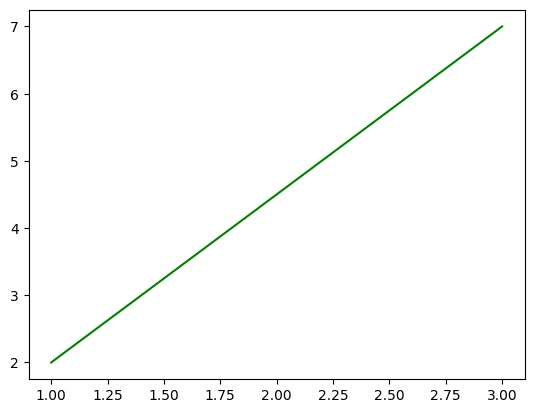

In [4]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

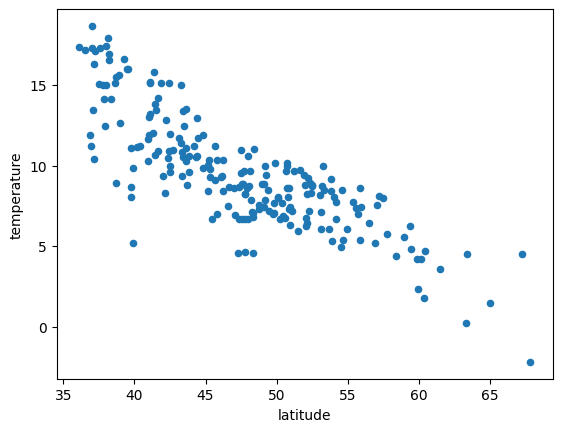

In [5]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

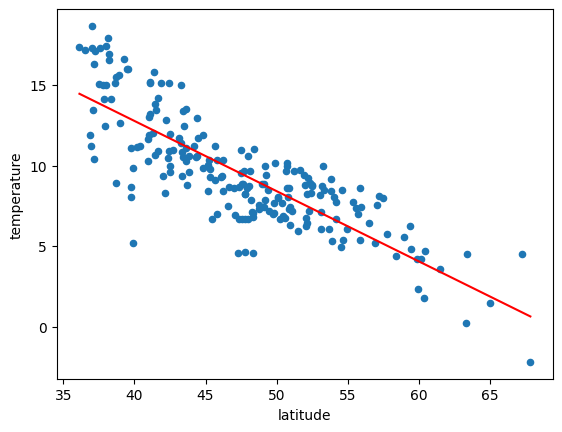

In [6]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [7]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


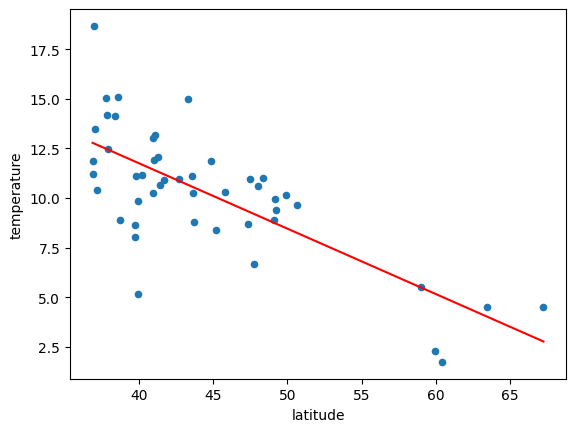

In [8]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1)
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [9]:
train.head()

,city,country,latitude,longitude,temperature,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,Adana,Turkey,36.99,35.32,18.67,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amiens,France,49.90,2.30,10.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Angers,France,47.48,-0.53,10.98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Ankara,Turkey,39.93,32.86,9.86,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Antalya,Turkey,36.89,30.70,11.88,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b)
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Ankara


/tmp/ipython-input-2730238009.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted temperature:', a * float(city.latitude) + b)
/tmp/ipython-input-2730238009.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual temperature:', float(city.temperature))


Predicted temperature: 11.781408903324248
Actual temperature: 9.86
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr

In [48]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


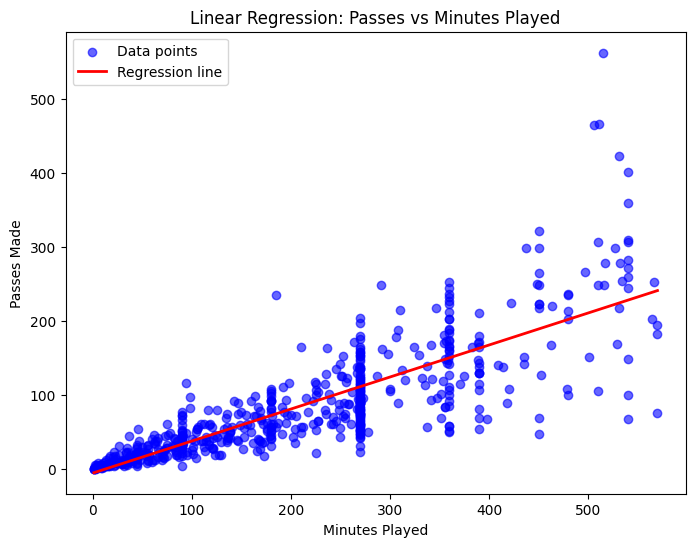

Equation: passes = -5.98 + 0.43 * minutes


In [49]:
# Assuming your DataFrame is called 'players'
# and has columns "minutes_played" and "passes_made"
X = players[["minutes"]]   # predictor (2D array)
y = players["passes"]        # target (1D array)

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Get regression line
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_vals)

# Plot scatter + regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Regression line")

# Labels and title
plt.xlabel("Minutes Played")
plt.ylabel("Passes Made")
plt.title("Linear Regression: Passes vs Minutes Played")
plt.legend()
plt.show()

# Print regression equation
print(f"Equation: passes = {model.intercept_:.2f} + {model.coef_[0]:.2f} * minutes")

In [55]:

# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.

Datenrahmen = pd.DataFrame()
Zusammenhänge_passes, _ = pearsonr(df['minutes'], df['passes'])

Zusammenhänge_tackles, _ = pearsonr(df['minutes'], df['tackles'])

Zusammenhänger_shots, _ = pearsonr(df['minutes'], df['shots'])

Zusammenhänger_saves, _ = pearsonr(df['minutes'], df['saves'])

print(f" Zusammenhänge (Passes vs Minutes):{Zusammenhänge_passes:.3f}")
print(f" Zusammenhänge (Tackles vs Minutes):{Zusammenhänge_tackles:.3f}")
print(f" Zusammenhänge (Shots vs Minutes): {Zusammenhänger_shots:.3f}")
print(f" Zusammenhänge (Saves vs Minutes): {Zusammenhänger_saves:.3f}")

 Zusammenhänge (Passes vs Minutes):0.990
 Zusammenhänge (Tackles vs Minutes):0.993
 Zusammenhänge (Shots vs Minutes): 1.000
 Zusammenhänge (Saves vs Minutes): -1.000


In [60]:
print(df.columns)
print(df.head())


Index(['minutes', 'passes', 'tackles', 'shots', 'saves'], dtype='object')
   minutes  passes  tackles  shots  saves
0       90      50       10      5      0
1       80      40        9      4      1
2       70      35        7      3      2
3       60      30        6      2      3
4       50      20        4      1      4


In [64]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
data = {
    'minutes': [90, 80, 70, 60, 50],
    'passes':  [50, 40, 35, 30, 20],
    'tackles': [10, 9, 7, 6, 4],
    'shots':   [5, 4, 3, 2, 1],
    'saves':   [0, 1, 2, 3, 4],
    'position': ["Forward", "Midfielder", "Defender", "Goalkeeper", "Goalkeeper"]
}
df = pd.DataFrame(data)

positions = df['position'].unique()

for pos in positions:
    sub = df[df['position'] == pos]
    print(f"\n=== {pos}s ===")

    if sub['passes'].nunique() > 1:
        z, _ = pearsonr(sub['minutes'], sub['passes'])
        print(f"Zusammenhänger (Pässe vs Minuten): {z:.3f}")
    else:
        print("Zusammenhänger (Pässe vs Minuten): N/A (keine Variation)")

    if sub['tackles'].nunique() > 1:
        z, _ = pearsonr(sub['minutes'], sub['tackles'])
        print(f"Zusammenhänger (Tackles vs Minuten): {z:.3f}")
    else:
        print("Zusammenhänger (Tackles vs Minuten): N/A (keine Variation)")

    if sub['shots'].nunique() > 1:
        z, _ = pearsonr(sub['minutes'], sub['shots'])
        print(f"Zusammenhänger (Schüsse vs Minuten): {z:.3f}")
    else:
        print("Zusammenhänger (Schüsse vs Minuten): N/A (keine Variation)")

    if pos == "Goalkeeper" and sub['saves'].nunique() > 1:
        z, _ = pearsonr(sub['minutes'], sub['saves'])
        print(f"Zusammenhänger (Saves vs Minuten): {z:.3f}")
    elif pos == "Goalkeeper":
        print("Zusammenhänger (Saves vs Minuten): N/A (keine Variation)")


=== Forwards ===
Zusammenhänger (Pässe vs Minuten): N/A (keine Variation)
Zusammenhänger (Tackles vs Minuten): N/A (keine Variation)
Zusammenhänger (Schüsse vs Minuten): N/A (keine Variation)

=== Midfielders ===
Zusammenhänger (Pässe vs Minuten): N/A (keine Variation)
Zusammenhänger (Tackles vs Minuten): N/A (keine Variation)
Zusammenhänger (Schüsse vs Minuten): N/A (keine Variation)

=== Defenders ===
Zusammenhänger (Pässe vs Minuten): N/A (keine Variation)
Zusammenhänger (Tackles vs Minuten): N/A (keine Variation)
Zusammenhänger (Schüsse vs Minuten): N/A (keine Variation)

=== Goalkeepers ===
Zusammenhänger (Pässe vs Minuten): 1.000
Zusammenhänger (Tackles vs Minuten): 1.000
Zusammenhänger (Schüsse vs Minuten): 1.000
Zusammenhänger (Saves vs Minuten): -1.000


Intercept: -4.988095238095241
Slope: 0.6702380952380953


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


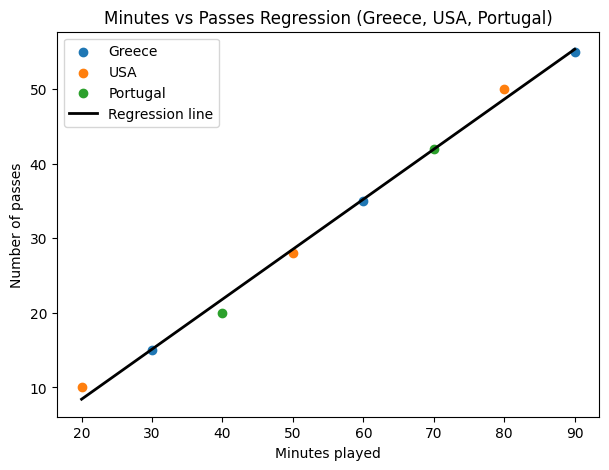

In [65]:
data = {
    'minutes': [90, 80, 70, 60, 50, 40, 30, 20],
    'passes':  [55, 50, 42, 35, 28, 20, 15, 10],
    'country': ["Greece", "USA", "Portugal", "Greece", "USA", "Portugal", "Greece", "USA"]
}
df = pd.DataFrame(data)

# Filter only Greece, USA, Portugal
df = df[df['country'].isin(["Greece", "USA", "Portugal"])]

# Prepare features and target
X = df[['minutes']]
y = df['passes']

# Train regression model
model = LinearRegression()
model.fit(X, y)

# Show regression coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Predict for plotting line
X_range = np.linspace(df['minutes'].min(), df['minutes'].max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plot data and regression line
plt.figure(figsize=(7,5))
for country in ["Greece", "USA", "Portugal"]:
    sub = df[df['country'] == country]
    plt.scatter(sub['minutes'], sub['passes'], label=country)

plt.plot(X_range, y_pred, color="black", linewidth=2, label="Regression line")
plt.xlabel("Minutes played")
plt.ylabel("Number of passes")
plt.title("Minutes vs Passes Regression (Greece, USA, Portugal)")
plt.legend()
plt.show()

In [71]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
data = {
    'surname': ["Papadopoulos", "Barry", "Gomez", "Pepe", "Smith", "Jones"],
    'minutes': [90, 80, 70, 60, 50, 40],
    'passes':  [55, 45, 38, 28, 20, 15],
    'country': ["Greece", "USA", "Portugal", "Portugal", "USA", "Greece"]
}
df = pd.DataFrame(data)

# Filter only Greece, USA, Portugal
df_train = df[df['country'].isin(["Greece", "USA", "Portugal"])]

# Train regression model
X = df_train[['minutes']]
y = df_train['passes']
model = LinearRegression()
model.fit(X, y)

print("Model trained: Passes ≈ {:.2f} + {:.2f} * Minutes".format(model.intercept_, model.coef_[0]))

# Interactive surname loop
while True:
    surname = input("Enter a player's surname (or 'quit' to stop): ").strip()
    if surname.lower() == "quit":
        break

    # Check if surname exists in dataset
    if surname not in df['surname'].values:
        print(f"⚠️ Player '{surname}' not found in dataset. Try another.\n")
        continue

    # Get player row
    player = df[df['surname'] == surname].iloc[0]
    minutes = player['minutes']
    actual_passes = player['passes']

    # Predict passes
    predicted_passes = model.predict([[minutes]])[0]

    print(f"\nPlayer: {surname}")
    print(f"Minutes played: {minutes}")
    print(f"Predicted passes: {predicted_passes:.1f}")
    print(f"Actual passes: {actual_passes}\n")

Model trained: Passes ≈ -19.43 + 0.81 * Minutes
Enter a player's surname (or 'quit' to stop): pepe
⚠️ Player 'pepe' not found in dataset. Try another.

Enter a player's surname (or 'quit' to stop): Pepe


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Player: Pepe
Minutes played: 60
Predicted passes: 29.4
Actual passes: 28

Enter a player's surname (or 'quit' to stop): quit


In [72]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
import pandas as pd
from sklearn.linear_model import LinearRegression

data = {
    'surname': ["Ronaldo", "Messi", "Kante", "Silva", "Ramos", "Chiellini",
                "Neuer", "Buffon", "Barry", "Gomez", "Pepe"],
    'minutes': [90, 85, 80, 70, 60, 50, 95, 88, 75, 65, 55],
    'passes':  [60, 58, 55, 50, 40, 38, 30, 28, 20, 18, 15],
    'position': ["Forward", "Forward", "Midfielder", "Midfielder",
                 "Defender", "Defender", "Goalkeeper", "Goalkeeper",
                 "Forward", "Defender", "Goalkeeper"]
}
df = pd.DataFrame(data)

models = {}
for pos in df['position'].unique():
    sub = df[df['position'] == pos]
    if len(sub) > 1:
        X, y = sub[['minutes']], sub['passes']
        models[pos] = LinearRegression().fit(X, y)
        print(f"Model for {pos}: Passes ≈ {models[pos].intercept_:.2f} + {models[pos].coef_[0]:.2f}*Minutes")
    else:
        print(f"No model trained for {pos} (insufficient data)")

while True:
    surname = input("Enter surname (or 'quit'): ").strip()
    if surname.lower() == "quit":
        break

    if surname not in df['surname'].values:
        print(f"Player '{surname}' not found.\n")
        continue

    player = df[df['surname'] == surname].iloc[0]
    pos = player.position

    if pos not in models:
        print(f"No model available for position {pos}.\n")
        continue

    minutes = player.minutes
    actual = player.passes
    predicted = models[pos].predict([[minutes]])[0]

    print(f"\nPlayer: {surname}")
    print(f"Position: {pos}")
    print(f"Minutes: {minutes}")
    print(f"Predicted passes: {predicted:.1f}")
    print(f"Actual passes: {actual}\n")

Model for Forward: Passes ≈ -189.71 + 2.83*Minutes
Model for Midfielder: Passes ≈ 15.00 + 0.50*Minutes
Model for Defender: Passes ≈ 97.00 + -1.11*Minutes
Model for Goalkeeper: Passes ≈ -5.89 + 0.38*Minutes
Enter surname (or 'quit'): messi
Player 'messi' not found.

Enter surname (or 'quit'): Messi


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Player: Messi
Position: Forward
Minutes: 85
Predicted passes: 50.7
Actual passes: 58

Enter surname (or 'quit'): quit
